# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
# Import the titanic dataset here
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [ ]:
#Check possible values
df_titanic["class"].unique()

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

In [ ]:
# Code here
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "engineer crew": "crew",
    "victualling crew": "crew",
    "restaurant staff": "crew",
    "deck crew": "crew"
})

df_titanic[df_titanic["type"] == "passenger"]
joint_distribution = pd.crosstab(df_passengers["embarked"], df_passengers["class"])
joint_distribution

class,1st,2nd,3rd
embarked,,,
B,3,6,0
C,143,26,102
Q,3,7,113
S,175,245,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [ ]:
# Code here

#Conditional distribution of class given embarked
class_given_embarked = joint_distribution / joint_distribution.sum(axis=0)
class_given_embarked

class,1st,2nd,3rd
embarked,,,
B,0.009259,0.021127,0.000000
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756


In [ ]:
#Conditional distribution of embarked given class
embarked_given_class = joint_distribution.div(joint_distribution.sum(axis=1), axis=0)
embarked_given_class

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,0.000000
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


Proportion of 3rd class given embarked at Southhampton
P(3rd | S) = 0.696756

Proportion of Southampton passengers were in 3rd class
P(S | 3rd) = 0.540481

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

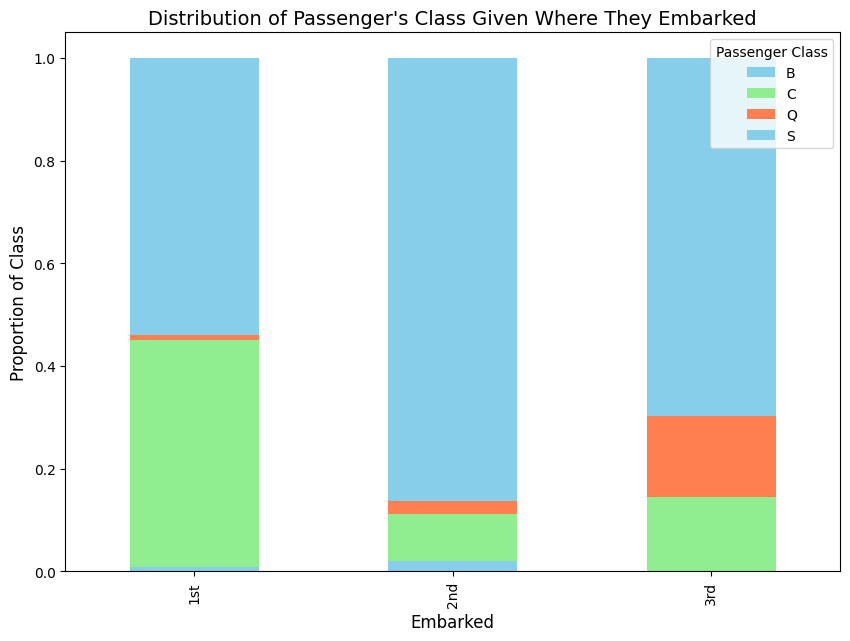

In [ ]:
# Code here

# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Plot the data
class_given_embarked.T.plot(kind='bar', stacked=True, figsize=(10, 7), color=['skyblue', 'lightgreen', 'coral'])

# Add labels and title
plt.title("Distribution of Passenger's Class Given Where They Embarked", fontsize=14)
plt.xlabel("Embarked", fontsize=12)
plt.ylabel("Proportion of Class", fontsize=12)
plt.legend(title="Passenger Class", loc="upper right")
plt.show()

**Pros:**
Visual representation makes it easier to comprehend
**Cons:**
Less details because no precise numbers